In [1]:
from keras.datasets import mnist
(x_train, y_train),(x_test,y_test) = mnist.load_data()

print('Shape of x_train:{}'.format(x_train.shape))
print('Shape of y_train:{}'.format(y_train.shape))
print('Shape of x_test:{}'.format(x_test.shape))
print('Shape of y_test:{}'.format(y_test.shape))

Shape of x_train:(60000, 28, 28)
Shape of y_train:(60000,)
Shape of x_test:(10000, 28, 28)
Shape of y_test:(10000,)


<function matplotlib.pyplot.show>

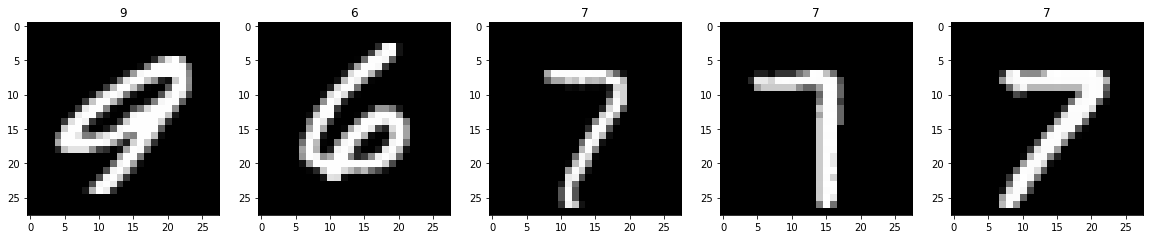

In [2]:
import matplotlib.pyplot as plt
import random 

fig, axis = plt.subplots(1,5, figsize=(20,20))

for i in range(5):
  ind = random.randint(0,x_train.shape[0])
  axis[i].imshow(x_train[ind,:,:], cmap='gray')
  axis[i].set_title(y_train[ind])


plt.show




In [3]:
x_train_vec = x_train.reshape(x_train.shape[0],-1)
x_test_vec = x_test.reshape(x_test.shape[0],-1)

print('Shape of x_train_vec:{}'.format(x_train_vec.shape))
print('Shape of x_test_vec:{}'.format(x_test_vec.shape))



Shape of x_train_vec:(60000, 784)
Shape of x_test_vec:(10000, 784)


In [4]:
import numpy as np 

def to_one_hot(labels, dimension=10):
  result = np.zeros((len(labels), dimension))
  for i, lab in enumerate(labels):
    result[i,lab]=1
  return result

y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)

print('Shape of one hot encoding : {}'.format(y_train_vec.shape))



Shape of one hot encoding : (60000, 10)


In [5]:
rand_indices = np.random.permutation(x_train_vec.shape[0])
train_indices = rand_indices[:50000]
valid_indices = rand_indices[50000:]

x_valid_vec = x_train_vec[valid_indices, :]
y_valid_vec = y_train_vec[valid_indices, :]

x_train_vec = x_train_vec[train_indices, :]
y_train_vec = y_train_vec[train_indices, :]

print('Shape of x_valid_vec : {}'.format(x_valid_vec.shape))
print('Shape of y_valid_vec : {}'.format(y_valid_vec.shape))
print('Shape of x_train_vec : {}'.format(x_train_vec.shape))
print('Shape of y_train_vec : {}'.format(y_train_vec.shape))



Shape of x_valid_vec : (10000, 784)
Shape of y_valid_vec : (10000, 10)
Shape of x_train_vec : (50000, 784)
Shape of y_train_vec : (50000, 10)


In [6]:
from keras import models
from keras import layers 

model = models.Sequential()
model.add(layers.Dense(10,activation='softmax',input_shape=(x_train_vec.shape[1], )))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [8]:
from keras import optimizers

model.compile(optimizers.RMSprop(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(x_train_vec, y_train_vec, batch_size=128, epochs=50, validation_data=(x_valid_vec, y_valid_vec))

Epoch 1/50
391/391 [==============================] - 1s 2ms/step - loss: 45.0553 - accuracy: 0.4785 - val_loss: 15.5778 - val_accuracy: 0.7273
Epoch 2/50
391/391 [==============================] - 1s 2ms/step - loss: 11.4066 - accuracy: 0.7825 - val_loss: 9.6121 - val_accuracy: 0.8200
Epoch 3/50
391/391 [==============================] - 1s 2ms/step - loss: 8.1064 - accuracy: 0.8321 - val_loss: 7.9194 - val_accuracy: 0.8394
Epoch 4/50
391/391 [==============================] - 1s 2ms/step - loss: 6.7666 - accuracy: 0.8505 - val_loss: 6.9543 - val_accuracy: 0.8537
Epoch 5/50
391/391 [==============================] - 1s 2ms/step - loss: 5.9463 - accuracy: 0.8604 - val_loss: 6.3258 - val_accuracy: 0.8636
Epoch 6/50
391/391 [==============================] - 1s 2ms/step - loss: 5.3714 - accuracy: 0.8673 - val_loss: 5.8934 - val_accuracy: 0.8656
Epoch 7/50
391/391 [==============================] - 1s 2ms/step - loss: 4.9170 - accuracy: 0.8726 - val_loss: 5.5125 - val_accuracy: 0.8715
Epo

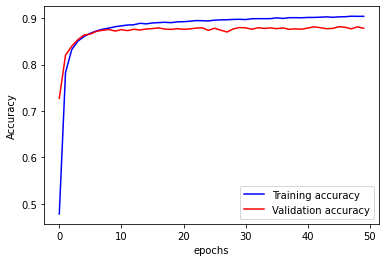

In [11]:
epochs = range(50)

train_acc = history.history['accuracy']
valid_acc = history.history['val_accuracy']

plt.plot(epochs, train_acc, 'b', label='Training accuracy')
plt.plot(epochs, valid_acc, 'r', label='Validation accuracy')

plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
(loss, accuracy) = model.evaluate(x_test_vec, y_test_vec)

print('loss {}: '.format(loss))
print('accuracy {}:'.format(accuracy))



313/313 [==============================] - 0s 1ms/step - loss: 1.8210 - accuracy: 0.8907
loss 1.820983648300171: 
accuracy 0.8906999826431274:
